In [1]:
#6.1.4
#Create latitude and longitude combinations

In [2]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

#The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple

In [4]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
print(coordinates)

[(6.7038599415928815, -7.468720071701256), (32.81937388308614, -58.91971321547574), (-39.20730509656333, -159.33607059682163), (45.58701007115033, -88.24117195805422), (71.52990751039826, 102.65397249541513), (-30.31080966423316, -102.01642474875779), (-18.058533017190086, 141.49672261167484), (-8.234910303837779, 78.69213604248995), (-19.06050797757611, -144.4611270464572), (52.57634607310686, -52.11637474875836), (87.43120961267735, -151.7161024323761), (82.10341363760918, 12.880119389261239), (80.22023248421436, -65.91010611314448), (18.644901038608168, -134.5584036932966), (1.9877151241087034, -93.46460143208121), (50.002806151814724, -73.3455783499736), (20.45091169032419, -125.76503210584579), (38.167711647346124, -167.4582942147476), (-80.11686715403484, -35.558548257326834), (21.065900300258534, -125.89531823560218), (65.26650150763257, 86.72633159058535), (-85.8303105906829, 143.5749015939008), (-39.93308260329784, -55.78113786015135), (36.539064808247815, 138.90121637264667),

In [6]:
#6.1.5
#Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
#Create a list for holding the cities.
cities = []

#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
#Print the city count to confirm sufficient count.
len(cities)

607

In [8]:
print(cities)

['duekoue', 'saint george', 'avarua', 'marinette', 'khatanga', 'lebu', 'mount isa', 'hithadhoo', 'tautira', 'saint anthony', 'barrow', 'barentsburg', 'narsaq', 'hilo', 'puerto ayora', 'normandin', 'guerrero negro', 'kapaa', 'ushuaia', 'san quintin', 'turukhansk', 'hobart', 'mar del plata', 'nakanojo', 'bluff', 'chokurdakh', 'karlskoga', 'punta arenas', 'albany', 'taolanaro', 'ilheus', 'rockwall', 'bilma', 'bredasdorp', 'port lincoln', 'hasaki', 'gorom-gorom', 'jamestown', 'kodiak', 'bandarbeyla', 'sabha', 'nanortalik', 'trelew', 'upernavik', 'nosy varika', 'bethel', 'castro', 'folsom', 'illoqqortoormiut', 'dikson', 'dzhusaly', 'coquimbo', 'hirado', 'belyy yar', 'port alfred', 'praia', 'georgetown', 'loandjili', 'vila franca do campo', 'talnakh', 'pravia', 'fukumitsu', 'asfi', 'qaanaaq', 'acapulco', 'hervey bay', 'jalu', 'tabiauea', 'new norfolk', 'angoche', 'vaini', 'belushya guba', 'gazojak', 'hermanus', 'mys shmidta', 'rikitea', 'butaritari', 'atuona', 'vestmannaeyjar', 'nome', 'behb

In [9]:
#6.2.6
#Get the City Weather Data

We will need to do the following:

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
4. Build the city_url or endpoint for each city.
5. Log the URL and the record and set numbers.
6. Make an API request for each city.
7. Parse the JSON weather data for the following:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [10]:
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
#Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in our list.
#for i in range(len(cities)):
 #   #Group cities in sets of 50 for logging purposes.
  #  if (i % 50 == 0 and i >= 50):
   #     set_count += 1
    #    record_count = 1
     #   time.sleep(60)

    #Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]    
    
#Loop through all the cities in the list.
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    #Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})    
    
    
#If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | duekoue
Processing Record 2 of Set 1 | saint george
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | marinette
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | mount isa
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | tautira
Processing Record 10 of Set 1 | saint anthony
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 1 | narsaq
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | normandin
Processing Record 17 of Set 1 | guerrero negro
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | san quintin
Processing Record 21 of Set 1 | turukhansk
Processing Record 22 of Set 1 | hobart
Processing

Processing Record 36 of Set 4 | pasinler
Processing Record 37 of Set 4 | andselv
City not found. Skipping...
Processing Record 38 of Set 4 | te anau
Processing Record 39 of Set 4 | basco
Processing Record 40 of Set 4 | sorvag
City not found. Skipping...
Processing Record 41 of Set 4 | bahia de caraquez
Processing Record 42 of Set 4 | pasighat
Processing Record 43 of Set 4 | lata
Processing Record 44 of Set 4 | henties bay
Processing Record 45 of Set 4 | hermiston
Processing Record 46 of Set 4 | hashtrud
Processing Record 47 of Set 4 | tuktoyaktuk
Processing Record 48 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 49 of Set 4 | phan thiet
Processing Record 50 of Set 4 | ponta do sol
Processing Record 1 of Set 5 | villaviciosa
Processing Record 2 of Set 5 | hami
Processing Record 3 of Set 5 | zavetnoye
Processing Record 4 of Set 5 | alice
Processing Record 5 of Set 5 | itaituba
Processing Record 6 of Set 5 | husavik
Processing Record 7 of Set 5 | labrea
Processing Re

Processing Record 21 of Set 8 | krasnoselkup
Processing Record 22 of Set 8 | yunhe
Processing Record 23 of Set 8 | tigil
Processing Record 24 of Set 8 | bara
Processing Record 25 of Set 8 | iisalmi
Processing Record 26 of Set 8 | lisakovsk
Processing Record 27 of Set 8 | lienz
Processing Record 28 of Set 8 | fort oglethorpe
Processing Record 29 of Set 8 | mount hagen
Processing Record 30 of Set 8 | manjacaze
Processing Record 31 of Set 8 | sheridan
Processing Record 32 of Set 8 | jiazi
Processing Record 33 of Set 8 | hirara
Processing Record 34 of Set 8 | isla aguada
Processing Record 35 of Set 8 | nalut
Processing Record 36 of Set 8 | fenyi
Processing Record 37 of Set 8 | todos santos
Processing Record 38 of Set 8 | provideniya
Processing Record 39 of Set 8 | bubaque
Processing Record 40 of Set 8 | sola
Processing Record 41 of Set 8 | vila
Processing Record 42 of Set 8 | auki
Processing Record 43 of Set 8 | soyo
Processing Record 44 of Set 8 | okato
Processing Record 45 of Set 8 | sok

Processing Record 14 of Set 12 | blackfoot
Processing Record 15 of Set 12 | khvorostyanka
Processing Record 16 of Set 12 | avesta
Processing Record 17 of Set 12 | kvareli
Processing Record 18 of Set 12 | jieshi
Processing Record 19 of Set 12 | zhangjiakou
Processing Record 20 of Set 12 | kastamonu
Processing Record 21 of Set 12 | itoman
Processing Record 22 of Set 12 | altay
Processing Record 23 of Set 12 | tabukiniberu
City not found. Skipping...
Processing Record 24 of Set 12 | sembakung
Processing Record 25 of Set 12 | atwater
Processing Record 26 of Set 12 | concordia
Processing Record 27 of Set 12 | vokhtoga
Processing Record 28 of Set 12 | kattivakkam
Processing Record 29 of Set 12 | novobiryusinskiy
Processing Record 30 of Set 12 | florianopolis
Processing Record 31 of Set 12 | muncar
Processing Record 32 of Set 12 | almeirim
Processing Record 33 of Set 12 | halifax
Processing Record 34 of Set 12 | rorvik
Processing Record 35 of Set 12 | mastic beach
Processing Record 36 of Set 

In [13]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Duekoue,6.7472,-7.3496,82.08,64,100,2.33,CI,2022-04-09 20:18:41
1,Saint George,37.1041,-113.5841,87.64,9,0,10.00,US,2022-04-09 20:18:42
2,Avarua,-21.2078,-159.7750,84.25,74,75,9.22,CK,2022-04-09 20:18:42
3,Marinette,45.1000,-87.6307,48.25,52,100,9.22,US,2022-04-09 20:18:42
4,Khatanga,71.9667,102.5000,-5.60,100,90,4.70,RU,2022-04-09 20:18:43
5,Lebu,-37.6167,-73.6500,54.86,83,100,1.25,CL,2022-04-09 20:18:43
6,Mount Isa,-20.7333,139.5000,78.57,34,80,5.75,AU,2022-04-09 20:18:43
7,Hithadhoo,-0.6000,73.0833,83.23,73,65,8.84,MV,2022-04-09 20:18:44
8,Tautira,-17.7333,-149.1500,81.16,79,98,20.71,PF,2022-04-09 20:18:44
9,Saint Anthony,45.0205,-93.2180,56.25,22,0,5.75,US,2022-04-09 20:18:44


In [14]:
#6.2.7

In [15]:
# Add the Pandas dependency
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Files to load
# Filename = "Folder/csvfilename"
city_data_to_load = "weather_data/cities.csv"

city_data_df = pd.read_csv(city_data_to_load)


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-04-04 00:47:43,-54.8000,-68.3000,37.06,93,40,21.85
1,Bambous Virieux,MU,2022-04-04 00:47:44,-20.3428,57.7575,79.21,83,75,10.36
2,New Norfolk,AU,2022-04-04 00:46:57,-42.7826,147.0587,65.91,65,58,2.35
3,Rikitea,PF,2022-04-04 00:47:43,-23.1203,-134.9692,77.43,65,100,9.60
4,Lebu,CL,2022-04-04 00:54:18,-37.6167,-73.6500,53.19,76,0,20.58
5,Mahebourg,MU,2022-04-04 00:54:18,-20.4081,57.7000,79.25,83,75,10.36
6,Manyana,BW,2022-04-04 00:54:18,-23.4000,21.7167,64.92,85,100,7.09
7,Hilo,US,2022-04-04 00:51:51,19.7297,-155.0900,76.24,90,100,5.01
8,Derzhavinsk,KZ,2022-04-04 00:54:19,51.1000,66.3167,36.90,74,100,10.58
9,Yar-Sale,RU,2022-04-04 00:54:19,66.8333,70.8333,15.22,88,100,19.44


In [17]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
#6.3.1
#Plot Latitude vs. Max Temperature

In [19]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

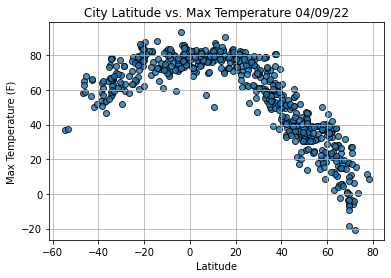

In [20]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plt
plt.show()

In [21]:
#6.3.2
#Plat latitude vs. Humidity

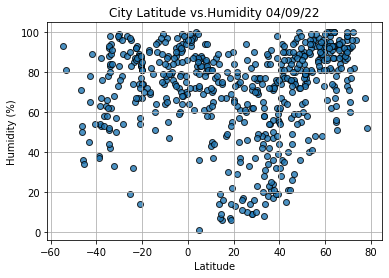

In [22]:
#Build the scatter plot for latitude vs. hudmity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs.Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plt
plt.show()

In [23]:
#6.3.3
#Plat latitude vs. Cloudiness

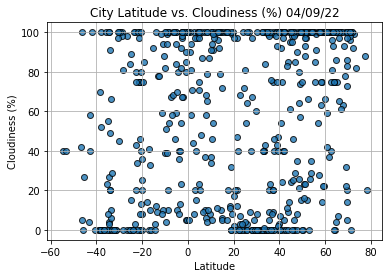

In [24]:
#Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plt
plt.show()

In [25]:
#6.3.4
#Plot Latitude vs. Wind Speed

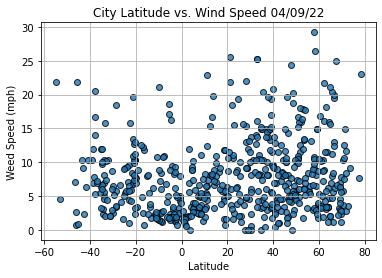

In [26]:
#Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Weed Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show plt
plt.show()

In [27]:
#6.4.2
#Find the Correlation Between Latitude and Maximum Temperature

In [28]:
#Create a Linear Regression Function

#Import linregress
from scipy.stats import linregress

#Create a function to create perform linear regression on the weather data
#and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
#If we run this code there will be no output until we call the function with five parameters.    

In [29]:
#To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13

City                       Hobart
Country                        AU
Date          2022-04-04 00:43:46
Lat                      -42.8794
Lng                      147.3294
Max Temp                    66.25
Humidity                       78
Cloudiness                     40
Wind Speed                   9.22
Name: 13, dtype: object

In [30]:
#To filter a DataFrame based on a value of a row
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4      False
       ...  
565     True
566     True
567    False
568     True
569     True
Name: Lat, Length: 570, dtype: bool

In [31]:
#Filter a DataFrame based on a value of a row. 
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
7,Hilo,US,2022-04-04 00:51:51,19.7297,-155.0900,76.24,90,100,5.01
8,Derzhavinsk,KZ,2022-04-04 00:54:19,51.1000,66.3167,36.90,74,100,10.58
9,Yar-Sale,RU,2022-04-04 00:54:19,66.8333,70.8333,15.22,88,100,19.44
10,Cayenne,GF,2022-04-04 00:49:26,4.9333,-52.3333,80.10,1,75,4.00
11,Thompson,CA,2022-04-04 00:54:20,55.7435,-97.8558,39.36,48,75,5.75
...,...,...,...,...,...,...,...,...,...
564,Dangriga,BZ,2022-04-04 01:09:03,16.9692,-88.2321,78.84,80,5,9.08
565,Olafsvik,IS,2022-04-04 01:09:03,64.8945,-23.7142,33.51,78,100,21.05
566,Margate,GB,2022-04-04 01:04:47,51.3813,1.3862,40.87,65,97,4.00
568,Berbera,SO,2022-04-04 01:09:04,10.4396,45.0143,79.68,81,5,3.04


In [32]:
#Return a DataFrame with all data fitting the criteria
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
7,Hilo,US,2022-04-04 00:51:51,19.7297,-155.0900,76.24,90,100,5.01
8,Derzhavinsk,KZ,2022-04-04 00:54:19,51.1000,66.3167,36.90,74,100,10.58
9,Yar-Sale,RU,2022-04-04 00:54:19,66.8333,70.8333,15.22,88,100,19.44
10,Cayenne,GF,2022-04-04 00:49:26,4.9333,-52.3333,80.10,1,75,4.00
11,Thompson,CA,2022-04-04 00:54:20,55.7435,-97.8558,39.36,48,75,5.75


In [33]:
#Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

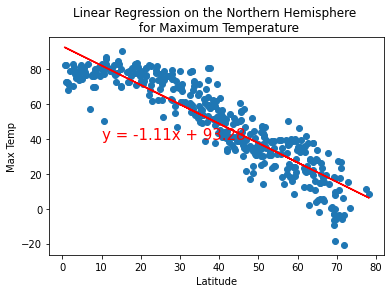

In [34]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function (right below 6.4.2)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))


#plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
#                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

In [35]:
linregress(x_values, y_values)

LinregressResult(slope=-1.1127857407057173, intercept=93.28419039670776, rvalue=-0.9075363061951184, pvalue=4.852837919267801e-152, stderr=0.02581237902553968, intercept_stderr=1.1361325244527247)

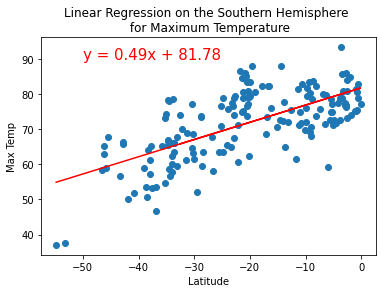

In [36]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function (right below 6.4.2)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

In [37]:
linregress(x_values, y_values)

LinregressResult(slope=0.4903953316282423, intercept=81.78000541403652, rvalue=0.6683064317074145, pvalue=2.363930851193054e-23, stderr=0.04211361115452341, intercept_stderr=1.0355627245704224)

In [38]:
#6.4.3
#Find the Correlation Between Latitude and Percent Humidity

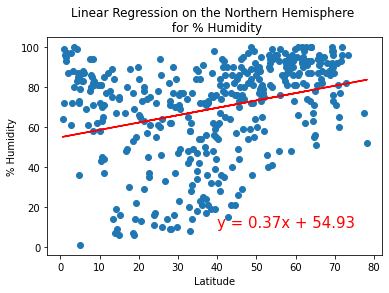

In [39]:
#Linear regression on the Percent Humidity for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the function (right below 6.4.2)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

In [40]:
linregress(x_values, y_values)

LinregressResult(slope=0.3683491674020176, intercept=54.92593452517538, rvalue=0.30282444383323176, pvalue=6.277056241003019e-10, stderr=0.058108712537356125, intercept_stderr=2.557656471820841)

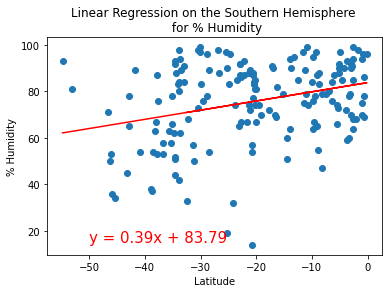

In [41]:
#Linear regression on the Percent Humidity for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function (right below 6.4.2)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

In [42]:
linregress(x_values, y_values)

LinregressResult(slope=0.39466955122988717, intercept=83.78631318199801, rvalue=0.3072988180640179, pvalue=4.577779867968641e-05, stderr=0.0942927907780858, intercept_stderr=2.3186351549673554)

In [43]:
#6.4.4
#Find the Correlation Between Latitude and Percent Cloudiness

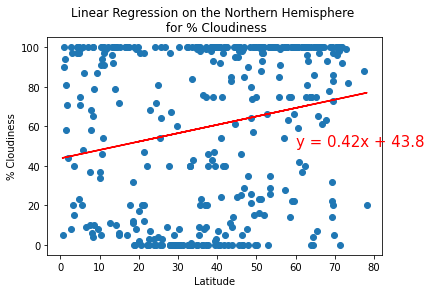

In [44]:
#Skill drill
#Linear regression on the Percent Cloudiness for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call the function (right below 6.4.2)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(60,50))

In [45]:
linregress(x_values, y_values)

LinregressResult(slope=0.4242967153395666, intercept=43.801399838520496, rvalue=0.20996306270828466, pvalue=2.301836671510203e-05, stderr=0.09903643282078904, intercept_stderr=4.3590911291882835)

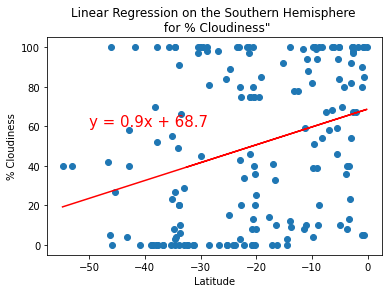

In [46]:
#Linear regression on the Percent Cloudiness for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function (right below 6.4.2)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness"', '% Cloudiness',(-50,60))

In [47]:
linregress(x_values, y_values)

LinregressResult(slope=0.9025965561050784, intercept=68.70326615974031, rvalue=0.3080097881848719, pvalue=4.386552405850102e-05, stderr=0.2150948369348779, intercept_stderr=5.289125992069859)

In [48]:
#6.4.5
#Find the Correlation Between Latitude and Wind Speed

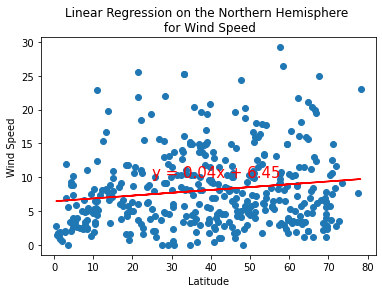

In [49]:
#Linear regression on the Wind Speed for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Call the function (right below 6.4.2)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(25,10))

In [50]:
linregress(x_values, y_values)

LinregressResult(slope=0.04187880847650092, intercept=6.449273664212755, rvalue=0.1517689367340526, pvalue=0.002338213438804487, stderr=0.013671295052052609, intercept_stderr=0.601742402149692)

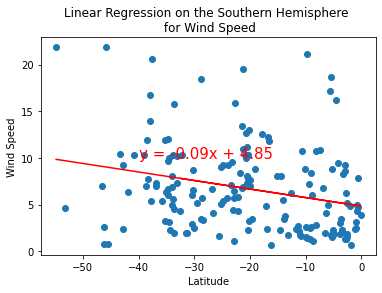

In [51]:
#Linear regression on the Wind Speed for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function (right below 6.4.2)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-40,10))

In [52]:
linregress(x_values, y_values)

LinregressResult(slope=-0.09122979486396147, intercept=4.848356678181137, rvalue=-0.2616626594285636, pvalue=0.0005673876894433072, stderr=0.025962071863994355, intercept_stderr=0.6384005820902716)